## Data Review and cleansing of D&B spreadshee for use later


In [3]:
%pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [6]:
df = pd.read_excel("data/TX_GA_company_list.xlsx")
df.head()

,Company Name,D-U-N-S® Number,Address Line 1,City,State Or Province,Postal Code,Country/Region,Phone,URL,Sales (USD),...,Ticker,Parent Company,Parent Country/Region,Global Ultimate Company,Global Ultimate Country/Region,D&B Hoovers Industry,US 8-Digit SIC Code,US 8-Digit SIC Description,US SIC 1987 Code,US SIC 1987 Description
0,"United Parcel Service, Inc.",6991681,55 Glenlake Pkwy,Atlanta,Georgia,30328-3498,United States,1-404-828-6000,http://www.ups.com,1.003380e+11,...,UPS,"United Parcel Service, Inc.",United States,"United Parcel Service, Inc.",United States,"Postal, Shipping and Messengers",42150000,"Courier services, except by air",4215,"Courier Services, Except by Air"
1,"The Home Depot, Inc.",72271711,2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.526690e+11,...,HD,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail,52110000,Lumber and other building materials,5211,Lumber and Other Building Materials Dealers
2,"Home Depot U.S.A., Inc.",783266950,2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.833747e+09,...,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home Furnishings Wholesale,50230000,Homefurnishings,5023,Home furnishings
3,"Home Depot International, Inc.",624242293,2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-384-3889,http://www.homedepot.com,8.038570e+08,...,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail,52119908,Home centers,5211,Lumber and Other Building Materials Dealers
4,Oracle Corporation,144709193,2300 Oracle Way,Austin,Texas,78741-1400,United States,1-737-867-1000,http://www.oracle.com,4.995400e+10,...,ORCL,Oracle Corporation,United States,Oracle Corporation,United States,Software,73720000,Prepackaged software,7372,Prepackaged Software


In [7]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company Name                    1315 non-null   object 
 1   D-U-N-S® Number                 1315 non-null   int64  
 2   Address Line 1                  1315 non-null   object 
 3   City                            1315 non-null   object 
 4   State Or Province               1315 non-null   object 
 5   Postal Code                     1315 non-null   object 
 6   Country/Region                  1315 non-null   object 
 7   Phone                           1270 non-null   object 
 8   URL                             1050 non-null   object 
 9   Sales (USD)                     1278 non-null   float64
 10  Employees (Single Site)         1315 non-null   int64  
 11  Employees 
(Total)              1315 non-null   int64  
 12  Business Description            13

Inspecting columns

In [23]:
print(df.columns.tolist())

['Company Name', 'D-U-N-S® Number', 'Address Line 1', 'City', 'State Or Province', 'Postal Code', 'Country/Region', 'Phone', 'URL', 'Sales (USD)', 'Employees (Single Site)', 'Employees \n(Total)', 'Business Description', 'Ownership Type', 'D&B Legal Status Type', 'Entity Type', 'Is Headquarters', 'Ticker', 'Parent Company', 'Parent Country/Region', 'Global Ultimate Company', 'Global Ultimate Country/Region', 'D&B Hoovers Industry', 'US 8-Digit SIC Code', 'US 8-Digit SIC Description', 'US SIC 1987 Code', 'US SIC 1987 Description']


Dropping and renaming columns

In [16]:
columns_to_drop = ["US SIC 1987 Description", "US SIC 1987 Code", 
                   "US 8-Digit SIC Code", "US 8-Digit SIC Description",
                   "D-U-N-S® Number", "Employees (Single Site)", "D&B Legal Status Type", "Is Headquarters"]

# Drop the specified columns
df_updated = df.drop(columns=columns_to_drop, errors='ignore')
df_updated.head()

,Company Name,Address Line 1,City,State Or Province,Postal Code,Country/Region,Phone,URL,Sales (USD),Employees \n(Total),Business Description,Ownership Type,Entity Type,Ticker,Parent Company,Parent Country/Region,Global Ultimate Company,Global Ultimate Country/Region,D&B Hoovers Industry
0,"United Parcel Service, Inc.",55 Glenlake Pkwy,Atlanta,Georgia,30328-3498,United States,1-404-828-6000,http://www.ups.com,1.003380e+11,500000,United Parcel Service Inc (UPS) is a provider ...,Public,Parent,UPS,"United Parcel Service, Inc.",United States,"United Parcel Service, Inc.",United States,"Postal, Shipping and Messengers"
1,"The Home Depot, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.526690e+11,463100,The Home Depot Inc (Home Depot) is a retailer ...,Public,Parent,HD,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail
2,"Home Depot U.S.A., Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.833747e+09,300000,"Home Depot U.S.A., Inc. is primarily engaged i...",Private,Subsidiary,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home Furnishings Wholesale
3,"Home Depot International, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-384-3889,http://www.homedepot.com,8.038570e+08,300000,"Home Depot International, Inc. is primarily en...",Private,Subsidiary,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail
4,Oracle Corporation,2300 Oracle Way,Austin,Texas,78741-1400,United States,1-737-867-1000,http://www.oracle.com,4.995400e+10,164000,Oracle Corp (Oracle) is a provider of cloud-ba...,Public,Parent,ORCL,Oracle Corporation,United States,Oracle Corporation,United States,Software


In [26]:
df_updated.rename(columns={
    "Sales (USD)": "Sales",
    "State Or Province": "State",
    "D&B Hoovers Industry": "Industry",
    "Employees \n(Total)": "Employees",
    "Address Line 1": "Address",
    "Country/Region": "Country"
}, inplace=True)
df_updated.to_csv("data/TX_GA_company_list_updated.csv", index=False)
df_updated.head()


,Company Name,Address,City,State,Postal Code,Country,Phone,URL,Sales,Employees,Business Description,Ownership Type,Entity Type,Ticker,Parent Company,Parent Country/Region,Global Ultimate Company,Global Ultimate Country/Region,Industry
0,"United Parcel Service, Inc.",55 Glenlake Pkwy,Atlanta,Georgia,30328-3498,United States,1-404-828-6000,http://www.ups.com,1.003380e+11,500000,United Parcel Service Inc (UPS) is a provider ...,Public,Parent,UPS,"United Parcel Service, Inc.",United States,"United Parcel Service, Inc.",United States,"Postal, Shipping and Messengers"
1,"The Home Depot, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.526690e+11,463100,The Home Depot Inc (Home Depot) is a retailer ...,Public,Parent,HD,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail
2,"Home Depot U.S.A., Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.833747e+09,300000,"Home Depot U.S.A., Inc. is primarily engaged i...",Private,Subsidiary,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home Furnishings Wholesale
3,"Home Depot International, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-384-3889,http://www.homedepot.com,8.038570e+08,300000,"Home Depot International, Inc. is primarily en...",Private,Subsidiary,NaN,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail
4,Oracle Corporation,2300 Oracle Way,Austin,Texas,78741-1400,United States,1-737-867-1000,http://www.oracle.com,4.995400e+10,164000,Oracle Corp (Oracle) is a provider of cloud-ba...,Public,Parent,ORCL,Oracle Corporation,United States,Oracle Corporation,United States,Software


**Writing updated columns to csv**

In [27]:
company_df = pd.read_csv("data/TX_GA_company_list_updated.csv")
company_df.info()
company_df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Company Name                    1315 non-null   object 
 1   Address                         1315 non-null   object 
 2   City                            1315 non-null   object 
 3   State                           1315 non-null   object 
 4   Postal Code                     1315 non-null   object 
 5   Country                         1315 non-null   object 
 6   Phone                           1270 non-null   object 
 7   URL                             1050 non-null   object 
 8   Sales                           1278 non-null   float64
 9   Employees                       1315 non-null   int64  
 10  Business Description            1315 non-null   object 
 11  Ownership Type                  1315 non-null   object 
 12  Entity Type                     13

Company Name                         0
Address                              0
City                                 0
State                                0
Postal Code                          0
Country                              0
Phone                               45
URL                                265
Sales                               37
Employees                            0
Business Description                 0
Ownership Type                       0
Entity Type                          0
Ticker                            1236
Parent Company                     275
Parent Country/Region              275
Global Ultimate Company            275
Global Ultimate Country/Region     275
Industry                             0
dtype: int64

**Clean up all the null values**

In [32]:
# Fill in the missing values in the DataFrame
company_df = company_df.assign(
    Ticker=company_df["Ticker"].fillna("Unknown"),
    Phone=company_df["Phone"].fillna("Unknown"),
    URL=company_df["URL"].fillna("Unknown"),
    Sales=company_df["Sales"].fillna(0),
    Parent_Company=company_df["Parent Company"].fillna("N/A"),
    Parent_Country_Region=company_df["Parent Country/Region"].fillna("N/A"),
    Global_Ultimate_Company=company_df["Global Ultimate Company"].fillna("N/A"),
    Global_Ultimate_Country_Region=company_df["Global Ultimate Country/Region"].fillna("N/A")
)
company_df.isnull().sum()
company_df.to_csv("data/TX_GA_company_list_cleaned.csv", index=False)

#### Create a new column named Sector and start categorizing the values from the Industry column

In [41]:
# Clean up the industry column with mapping
sector_mapping = {
    # Healthcare
    'Hospitals': 'Healthcare',
    'Home Health Care Services': 'Healthcare',
    'Nursing and Residential Care': 'Healthcare',
    'Outpatient Care': 'Healthcare',
    'Physicians and Health Practitioners': 'Healthcare',
    'Medical Equipment and Supplies': 'Healthcare',
    'Pharmaceutical Manufacturing': 'Healthcare',
    'Dentists': 'Healthcare',

    # Banking & Finance
    'Banking': 'Banking',
    'Securities': 'Banking',
    'Investment Services': 'Banking',
    'Life and Health Insurance': 'Banking',
    'Property and Casualty Insurance': 'Banking',
    'Insurance Services': 'Banking',
    'Mortgage and Credit': 'Banking',
    'Pensions and Funds': 'Banking',

    # Travel & Hospitality
    'Airlines': 'Travel',
    'Hotels and Accommodation': 'Travel',
    'Travel and Reservation Services': 'Travel',
    'Gambling and Casinos': 'Travel',
    'Golf Courses and Country Clubs': 'Travel',

    # Retail
    'Home and Garden Retail': 'Retail',
    'Grocery Stores': 'Retail',
    'Restaurants and Bars': 'Retail',
    'Electronics and Appliances Stores': 'Retail',
    'Non-store Retail': 'Retail',
    'Miscellaneous Store Retailers': 'Retail',
    'Clothing and Apparel Stores': 'Retail',

    # Manufacturing
    'Automotive': 'Manufacturing',
    'Chemical Manufacturing': 'Manufacturing',
    'Textile Manufacturing': 'Manufacturing',
    'Food Manufacturing': 'Manufacturing',
    'Aircraft Engine and Parts Manufacturing': 'Manufacturing',
    'Motor Vehicle Manufacturing': 'Manufacturing',
    'Rubber and Plastic Product Manufacturing': 'Manufacturing',
    'Weapons and Ammunition Manufacturing': 'Manufacturing',

    # Technology
    'Software': 'Technology',
    'Computer System Design Services': 'Technology',
    'Internet and Web Services': 'Technology',
    'Data Processing': 'Technology',
    'Computer Programming': 'Technology',
    'Computer and Peripheral Equipment Manufacturing': 'Technology',

    # Transportation & Logistics
    'Postal, Shipping and Messengers': 'Transportation & Logistics',
    'Trucking': 'Transportation & Logistics',
    'Road Transportation Services': 'Transportation & Logistics',
    'Air Transportation Services': 'Transportation & Logistics',
    'Railroad Transport': 'Transportation & Logistics',
    'Shipping and Water Transportation Services': 'Transportation & Logistics',

    # Construction & Real Estate
    'Residential and Commercial Building Construction': 'Construction & Real Estate',
    'Civil Engineering': 'Construction & Real Estate',
    'Real Estate Agents and Brokers': 'Construction & Real Estate',
    'Property Managers': 'Construction & Real Estate',
    'Commercial Real Estate Leasing': 'Construction & Real Estate',

    # Energy & Utilities
    'Electricity Generation and Distribution': 'Energy & Utilities',
    'Natural Gas Distribution': 'Energy & Utilities',
    'Petroleum and Natural Gas Extraction': 'Energy & Utilities',
    'Pipeline Transportation': 'Energy & Utilities',

    # Education
    'Colleges and Universities': 'Education',
    'Primary and Secondary Education': 'Education',
    'Miscellaneous Educational Services': 'Education',

    # Entertainment & Recreation
    'Movies': 'Entertainment & Recreation',
    'Spectator Sports': 'Entertainment & Recreation',
    'Museums and Historical Sites': 'Entertainment & Recreation',
    'Performing Arts': 'Entertainment & Recreation',

    # Miscellaneous
    'Waste Management': 'Miscellaneous',
    'Courts, Justice and Public Safety': 'Miscellaneous',
    'Administration of Public Programs': 'Miscellaneous',
    'Space Research and Technology': 'Miscellaneous',
}
company_df['Sector'] = company_df['Industry'].map(sector_mapping).fillna('Other')

In [42]:
company_df.head()

,Company Name,Address,City,State,Postal Code,Country,Phone,URL,Sales,Employees,...,Parent Company,Parent Country/Region,Global Ultimate Company,Global Ultimate Country/Region,Industry,Parent_Company,Parent_Country_Region,Global_Ultimate_Company,Global_Ultimate_Country_Region,Sector
0,"United Parcel Service, Inc.",55 Glenlake Pkwy,Atlanta,Georgia,30328-3498,United States,1-404-828-6000,http://www.ups.com,1.003380e+11,500000,...,"United Parcel Service, Inc.",United States,"United Parcel Service, Inc.",United States,"Postal, Shipping and Messengers","United Parcel Service, Inc.",United States,"United Parcel Service, Inc.",United States,Transportation & Logistics
1,"The Home Depot, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.526690e+11,463100,...,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Retail
2,"Home Depot U.S.A., Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-433-8211,http://www.homedepot.com,1.833747e+09,300000,...,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home Furnishings Wholesale,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Other
3,"Home Depot International, Inc.",2455 Paces Ferry Rd Se,Atlanta,Georgia,30339-6444,United States,1-770-384-3889,http://www.homedepot.com,8.038570e+08,300000,...,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Home and Garden Retail,"The Home Depot, Inc.",United States,"The Home Depot, Inc.",United States,Retail
4,Oracle Corporation,2300 Oracle Way,Austin,Texas,78741-1400,United States,1-737-867-1000,http://www.oracle.com,4.995400e+10,164000,...,Oracle Corporation,United States,Oracle Corporation,United States,Software,Oracle Corporation,United States,Oracle Corporation,United States,Technology


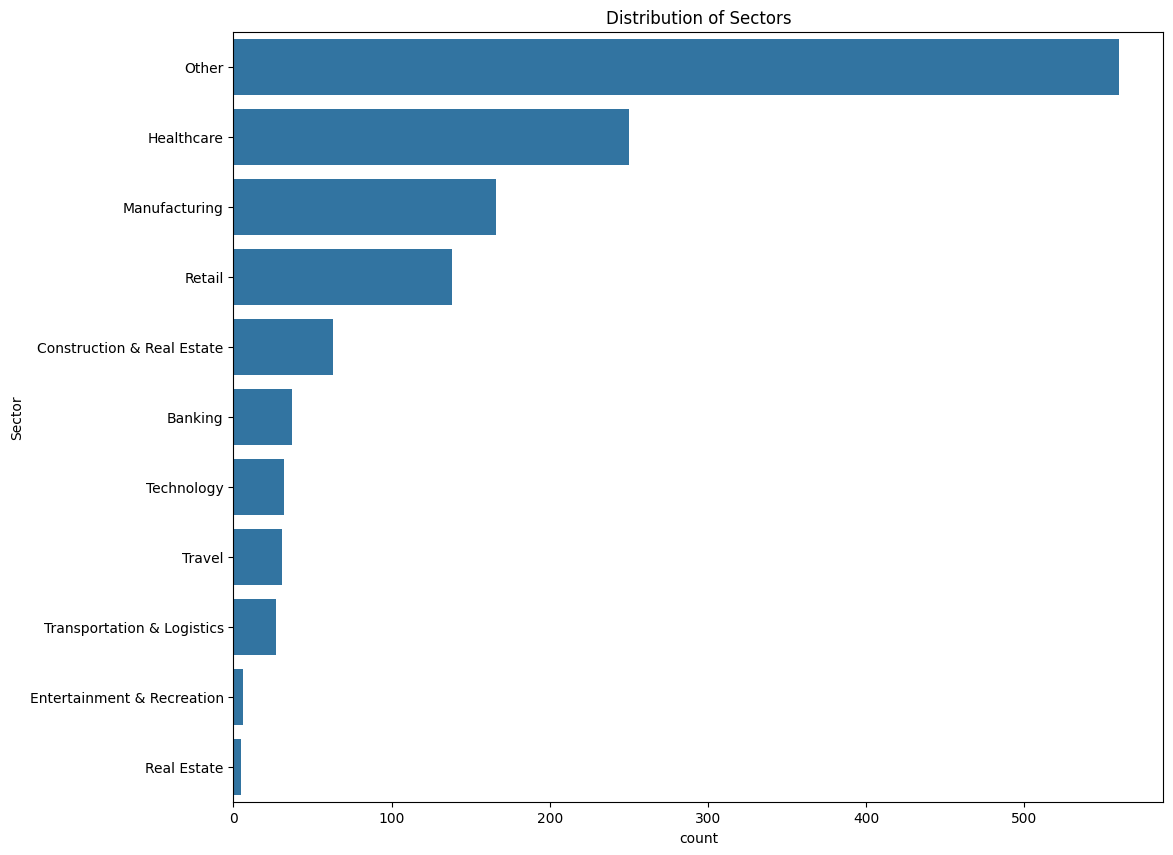

In [ ]:
# Distribution of sectors
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.countplot(y='Sector', data=company_df, order=company_df['Sector'].value_counts().index)
plt.title('Distribution of Sectors')
plt.show()

In [45]:
other_count = company_df[company_df['Sector'] == 'Other'].shape[0]
print(f"Number of 'Other' entries: {other_count}")

Number of 'Other' entries: 567


In [74]:
keywords_to_sectors = {
    'Wholesale': 'Retail',
    'Telecommunications': 'Technology',
    'Manufacturing': 'Manufacturing',
    'Construction': 'Construction & Real Estate',
    'Rental': 'Real Estate',
    'Media': 'Entertainment & Recreation',
    'Transportation': 'Transportation & Logistics',
    'Airlines': 'Travel',
    'Health': 'Healthcare',
    'Finance': 'Banking',
    'Travel': 'Travel',
    'Software': 'Technology',
    'Insurance': 'Banking',
    'Hotels': 'Travel',
    'Restaurants': 'Retail',
    'Apparel': 'Retail',
    'Hospital': 'Healthcare',
    'Bank': 'Banking',
    'Care': 'Healthcare',
    'Retail': 'Retail',
    'Stores': 'Retail',
    'Real Estate': 'Construction & Real Estate',
    'Manufacture': 'Manufacturing',
    
}

def map_sector(industry):
    for keyword, sector in keywords_to_sectors.items():
        if keyword in industry:
            return sector
    return 'Other'

# Apply to the DataFrame
company_df['Sector'] = company_df['Industry'].apply(map_sector)


In [75]:
other_industries = company_df[company_df['Sector'] == 'Other']['Industry'].unique()
print(f"Unique industries categorized as 'Other':" , len(other_industries))
print(other_industries)


Unique industries categorized as 'Other': 68
['Postal, Shipping and Messengers' 'Colleges and Universities'
 'Architecture and Engineering' 'Courts, Justice and Public Safety'
 'Gasoline Stations and Fuel Dealers' 'Waste Management'
 'Business Support Services' 'Computer System Design Services'
 'Railroad Transport' 'Securities' 'Executive and Legislature'
 'Electricity Generation and Distribution'
 'Primary and Secondary Education' 'Cable and Other Program Distribution'
 'Civil Engineering' 'Building and Dwelling Services'
 'Miscellaneous Professional Services'
 'Petroleum and Natural Gas Extraction' 'Holding Companies'
 'Natural Gas Distribution' 'Motor Vehicle and Parts Dealers' 'Trucking'
 'Exchanges' 'Administration of Public Programs' 'Data Processing'
 'Research and Development Services' 'Non-Metallic Minerals Mining'
 'Publishing' 'Consulting Services' 'Support Activities for Mining'
 'Movies' 'Internet and Web Services' 'Social and Rehabilitation Services'
 'Administrative Ser

In [76]:
sector_mapping.update({
    # Logistics & Transportation
    'Postal, Shipping and Messengers': 'Transportation & Logistics',
    'Railroad Transport': 'Transportation & Logistics',
    'Trucking': 'Transportation & Logistics',

    # Education
    'Colleges and Universities': 'Education',
    'Primary and Secondary Education': 'Education',
    'Miscellaneous Educational Services': 'Education',

    # Architecture & Engineering
    'Architecture and Engineering': 'Construction & Real Estate',
    'Civil Engineering': 'Construction & Real Estate',
    'Building and Dwelling Services': 'Construction & Real Estate',

    # Government & Public Services
    'Courts, Justice and Public Safety': 'Government & Public Services',
    'Executive and Legislature': 'Government & Public Services',
    'Administration of Public Programs': 'Government & Public Services',

    # Energy & Utilities
    'Gasoline Stations and Fuel Dealers': 'Energy & Utilities',
    'Electricity Generation and Distribution': 'Energy & Utilities',
    'Natural Gas Distribution': 'Energy & Utilities',
    'Petroleum and Natural Gas Extraction': 'Energy & Utilities',
    'Water and Sewage Services': 'Energy & Utilities',

    # Waste Management
    'Waste Management': 'Energy & Utilities',

    # Business Services
    'Business Support Services': 'Business Services',
    'Administrative Services': 'Business Services',
    'Consulting Services': 'Business Services',
    'Investment Services': 'Banking',
    'Employment Services': 'Business Services',
    'Associations and Organizations': 'Business Services',
    'Investigation and Security Services': 'Business Services',
    'Advertising Services': 'Business Services',

    # Finance & Insurance
    'Securities': 'Banking',
    'Holding Companies': 'Banking',
    'Exchanges': 'Banking',
    'Mortgage and Credit': 'Banking',
    'Pensions and Funds': 'Banking',

    # Technology
    'Computer System Design Services': 'Technology',
    'Data Processing': 'Technology',
    'Internet and Web Services': 'Technology',
    'Computer Programming': 'Technology',
    'Miscellaneous Telecommunication Services': 'Technology',
    'Computer and Office Machine Repair and Maintenance': 'Technology',

    # Manufacturing
    'Industrial Machinery Repair and Maintenance': 'Manufacturing',
    'Medical Equipment and Supplies': 'Healthcare',
    'Non-Metallic Minerals Mining': 'Manufacturing',
    'Printing': 'Manufacturing',

    # Healthcare & Social Services
    'Social and Rehabilitation Services': 'Healthcare',
    'Ambulatory Services': 'Healthcare',
    'Dentists': 'Healthcare',

    # Agriculture
    'Crop and Animal Production': 'Agriculture',

    # Entertainment & Recreation
    'Movies': 'Entertainment & Recreation',
    'Spectator Sports': 'Entertainment & Recreation',
    'Fitness and Recreation Centers': 'Entertainment & Recreation',
    'Museums and Historical Sites': 'Entertainment & Recreation',
    'Gambling and Casinos': 'Entertainment & Recreation',
    'Performing Arts': 'Entertainment & Recreation',
    'Promoters and Agents': 'Entertainment & Recreation',
    'Miscellaneous Amusement and Recreation': 'Entertainment & Recreation',
    'Golf Courses and Country Clubs': 'Entertainment & Recreation',

    # Space & Research
    'Research and Development Services': 'Science & Research',
    'Space Research and Technology': 'Science & Research',

    # Miscellaneous
    'Miscellaneous Professional Services': 'Miscellaneous',
    'Nonclassifiable Establishments': 'Miscellaneous',
    'Photographic Services': 'Miscellaneous',
    'Miscellaneous Personal Services': 'Miscellaneous',
    'Property Managers': 'Construction & Real Estate',
    'Facilities Management': 'Business Services',
})


In [77]:
company_df['Sector'] = company_df['Industry'].map(sector_mapping).fillna('Other')

In [79]:
remaining_others = company_df[company_df['Sector'] == 'Other']['Industry'].unique()
print(f"Unique industries categorized as 'Other':" , len(remaining_others))
print(remaining_others)


Unique industries categorized as 'Other': 40
['Machinery and Equipment Manufacturing'
 'Sporting Goods and Recreation Stores' 'Beverage Manufacturing'
 'Department Stores' 'Specialty Construction Trade Contractors'
 'Death Care Services' 'Cable and Other Program Distribution'
 'Motor Vehicle and Parts Dealers' 'Clothing and Apparel Manufacturing'
 'Home Furnishings Retail' 'Basic Chemical Manufacturing'
 'Petroleum Product Manufacturing'
 'Electrical Equipment and Appliances Manufacturing'
 'Miscellaneous Wholesale' 'Train and Railroad Equipment Manufacturing'
 'Non-Metallic Mineral Product Manufacturing'
 'Pharmacies and Personal Care Stores' 'Consumer Goods Rental'
 'Support Activities for Mining' 'Synthetic Chemical Manufacturing'
 'Computer, Office Equipment and Software Merchant Wholesalers'
 'Metal Products Manufacturing'
 'Cement and Concrete Product Manufacturing'
 'Mass Transit and Ground Passenger Transportation' 'Insurance Agents'
 'Residential Real Estate Leasing' 'Furnitur

In [84]:
sector_counts = company_df['Sector'].value_counts()
print(sector_counts)


Sector
Healthcare                      247
Other                           208
Education                       114
Business Services                90
Construction & Real Estate       86
Retail                           86
Manufacturing                    82
Banking                          79
Technology                       78
Energy & Utilities               74
Government & Public Services     43
Entertainment & Recreation       33
Travel                           31
Transportation & Logistics       26
Miscellaneous                    26
Science & Research                7
Agriculture                       5
Name: count, dtype: int64


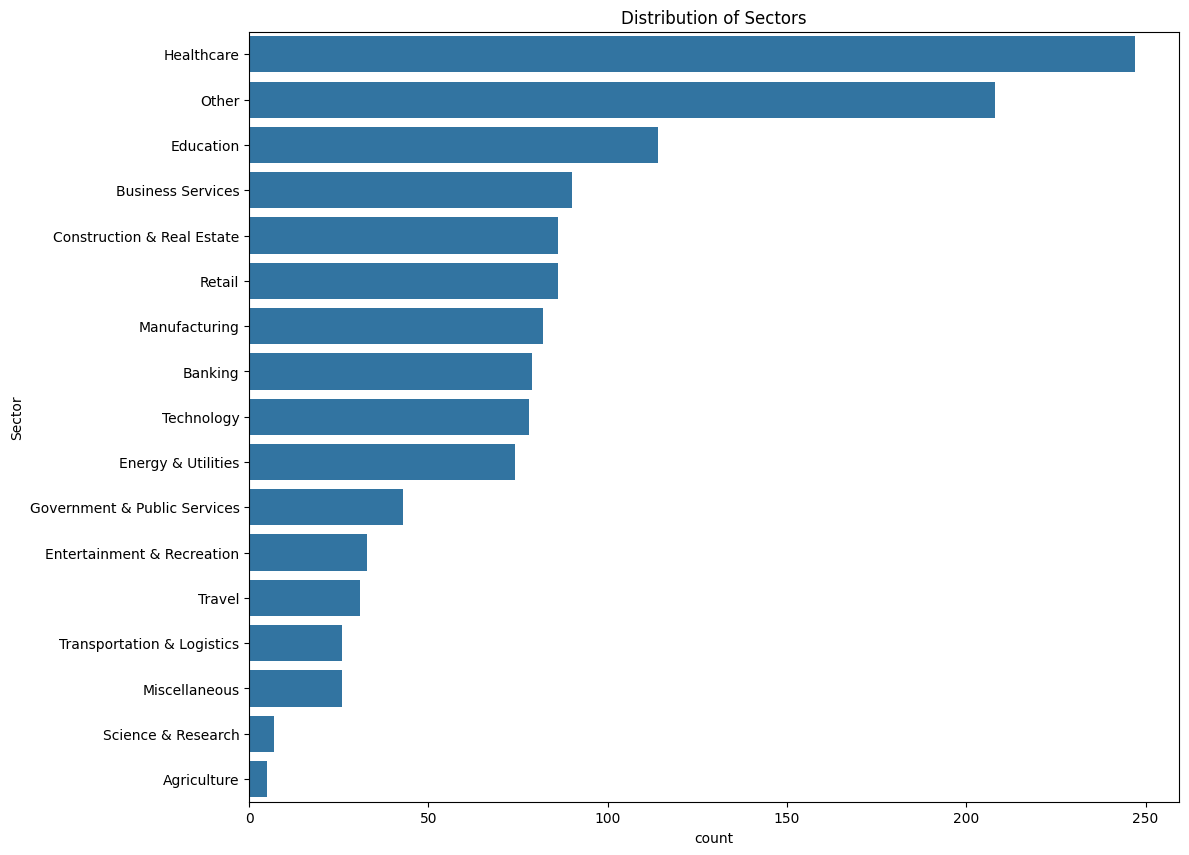

In [83]:
# Distribution of sectors
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.countplot(y='Sector', data=company_df, order=company_df['Sector'].value_counts().index)
plt.title('Distribution of Sectors')
plt.show()

In [88]:
sector_mapping.update({
    'Machinery and Equipment Manufacturing': 'Manufacturing',
    'Sporting Goods and Recreation Stores': 'Retail',
    'Beverage Manufacturing': 'Manufacturing',
    'Department Stores': 'Retail',
    'Specialty Construction Trade Contractors': 'Construction & Real Estate',
    'Death Care Services': 'Healthcare',
    'Cable and Other Program Distribution': 'Technology',
    'Motor Vehicle and Parts Dealers' : 'Retail',
    'Clothing and Apparel Manufacturing': 'Manufacturing',
    'Home Furnishings Retail': 'Retail',
    'Basic Chemical Manufacturing': 'Manufacturing',
    'Petroleum Product Manufacturing': 'Manufacturing',
    'Electrical Equipment and Appliances Manufacturing': 'Manufacturing',
    'Miscellaneous Wholesale': 'Retail',
    'Train and Railroad Equipment Manufacturing': 'Manufacturing',
    'Non-Metallic Mineral Product Manufacturing': 'Manufacturing',
    'Pharmacies and Personal Care Stores': 'Retail',
    'Consumer Goods Rental': 'Retail',
    'Support Activities for Mining': 'Energy & Utilities',
    'Synthetic Chemical Manufacturing': 'Manufacturing',
    'Computer, Office Equipment and Software Merchant Wholesalers': 'Retail',
    'Metal Products Manufacturing': 'Manufacturing',
    'Cement and Concrete Product Manufacturing': 'Manufacturing',
    'Mass Transit and Ground Passenger Transportation' : 'Transportation & Logistics',
    'Insurance Agents': 'Banking',
    'Residential Real Estate Leasing': 'Construction & Real Estate', 
    'Furniture Manufacturing': 'Manufacturing',
    'Wood Product Manufacturing': 'Manufacturing',
    'Legal Services': 'Business Services',
    'Communications Equipment Manufacturing': 'Manufacturing',
    'Electromedical and Control Instruments Manufacturing': 'Manufacturing',
    'Motor Vehicle Repair and Maintenance': 'Retail',
    'Chemical Wholesale': 'Retail',
    'Real Estate Services': 'Construction & Real Estate',
    'Miscellaneous Rental': 'Retail',
    'Motor Vehicle Rental': 'Retail',
    'Motor Vehicle Parts Manufacturing': 'Manufacturing', 
    'Transportation Equipment Wholesale': 'Retail',
    'Child Day Care Services': 'Healthcare',
    'Paint, Coating, and Adhesive Manufacturing': 'Manufacturing',
})

In [89]:
company_df['Sector'] = company_df['Industry'].map(sector_mapping).fillna('Other')

In [90]:
remaining_others = company_df[company_df['Sector'] == 'Other']['Industry'].unique()
print(remaining_others)


[]


In [93]:
sector_counts = company_df['Sector'].value_counts()
print(sector_counts)
company_df.to_csv("data/TX_GA_company_list_final.csv", index=False)


Sector
Healthcare                      252
Manufacturing                   179
Construction & Real Estate      129
Retail                          125
Education                       114
Business Services                91
Banking                          87
Technology                       82
Energy & Utilities               78
Government & Public Services     43
Entertainment & Recreation       33
Transportation & Logistics       33
Travel                           31
Miscellaneous                    26
Science & Research                7
Agriculture                       5
Name: count, dtype: int64


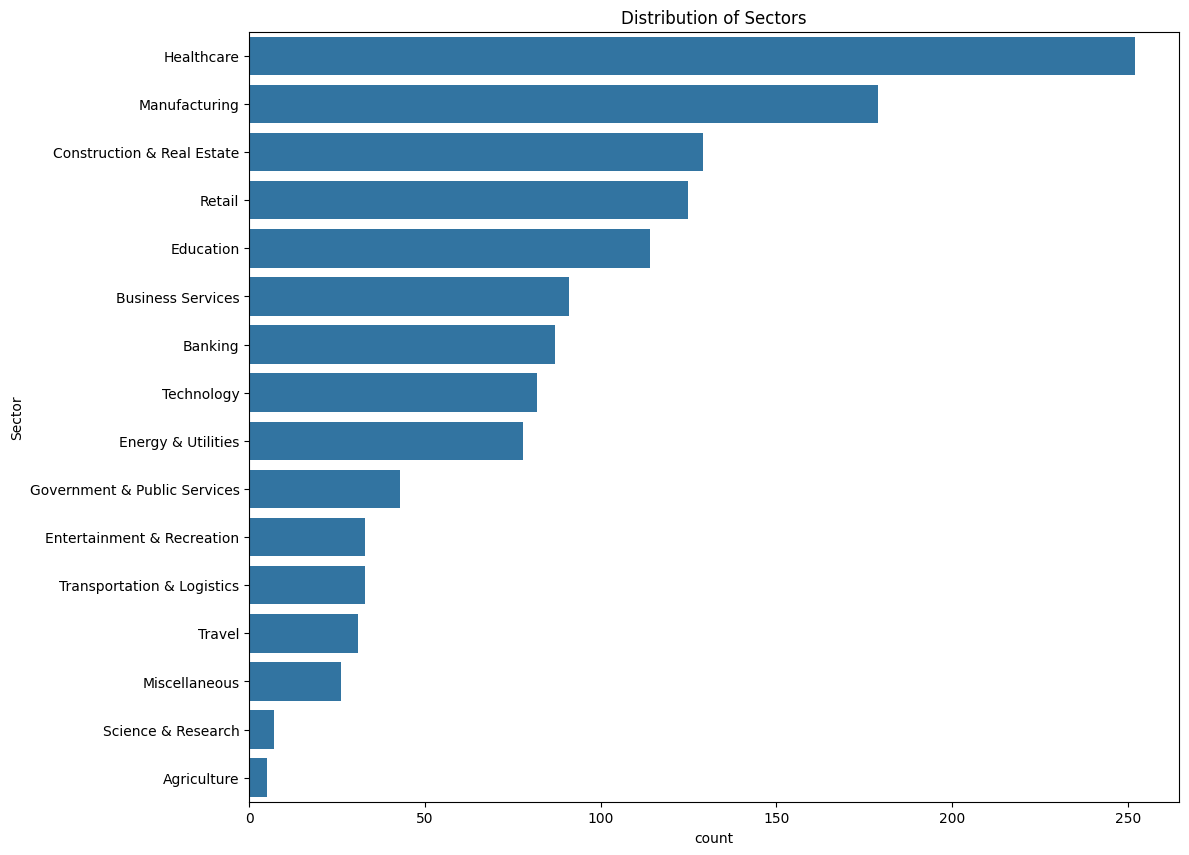

In [92]:
# Distribution of sectors
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.countplot(y='Sector', data=company_df, order=company_df['Sector'].value_counts().index)
plt.title('Distribution of Sectors')
plt.show()

In [95]:
company_df.tail()

,Company Name,Address,City,State,Postal Code,Country,Phone,URL,Sales,Employees,...,Parent Company,Parent Country/Region,Global Ultimate Company,Global Ultimate Country/Region,Industry,Parent_Company,Parent_Country_Region,Global_Ultimate_Company,Global_Ultimate_Country_Region,Sector
1310,"Sprinkles Cupcakes, LLC",7710 Rialto Blvd Unit 150,Austin,Texas,78735-8579,United States,1-737-204-5467,http://www.sprinkles.com,11078029.0,500,...,N/A,N/A,N/A,N/A,Food Manufacturing,N/A,N/A,N/A,N/A,Manufacturing
1311,"Terry Enterprises Headquarters, LLC",5555 N Lamar Blvd Ste E109,Austin,Texas,78751-1001,United States,1-512-451-9393,Unknown,10288291.0,500,...,N/A,N/A,N/A,N/A,Consulting Services,N/A,N/A,N/A,N/A,Business Services
1312,"Vaden's Acoustics & Drywall, Inc.",8795 Harmon Rd,Fort Worth,Texas,76177-7501,United States,1-817-847-8822,http://www.vadensacoustics.com,53733810.0,500,...,N/A,N/A,N/A,N/A,Specialty Construction Trade Contractors,N/A,N/A,N/A,N/A,Construction & Real Estate
1313,United Real Estate,5430 Lyndon B Johnson Fwy,Dallas,Texas,75240-2601,United States,1-817-262-0621,http://www.unitedrealestatedallas.com,11469420.0,500,...,N/A,N/A,N/A,N/A,Real Estate Agents and Brokers,N/A,N/A,N/A,N/A,Construction & Real Estate
1314,"New Process Steel Holding Co., Inc.",1322 N Post Oak Rd,Houston,Texas,77055-5406,United States,1-713-686-9631,Unknown,0.0,500,...,N/A,N/A,N/A,N/A,Holding Companies,N/A,N/A,N/A,N/A,Banking
